### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Top 10 paesi:
                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4 

Consumo medio annuale:
   Birra: 106.16, Vino: 49.45, Distillati: 80.99

Paese con il massimo alcohol_index:
   Andorra con indice 231.67

Paesi con più di 100 birre l’anno:
['Andorra', 'Angola', 'Antigua & Barbuda', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Cameroon', 'Canada', 

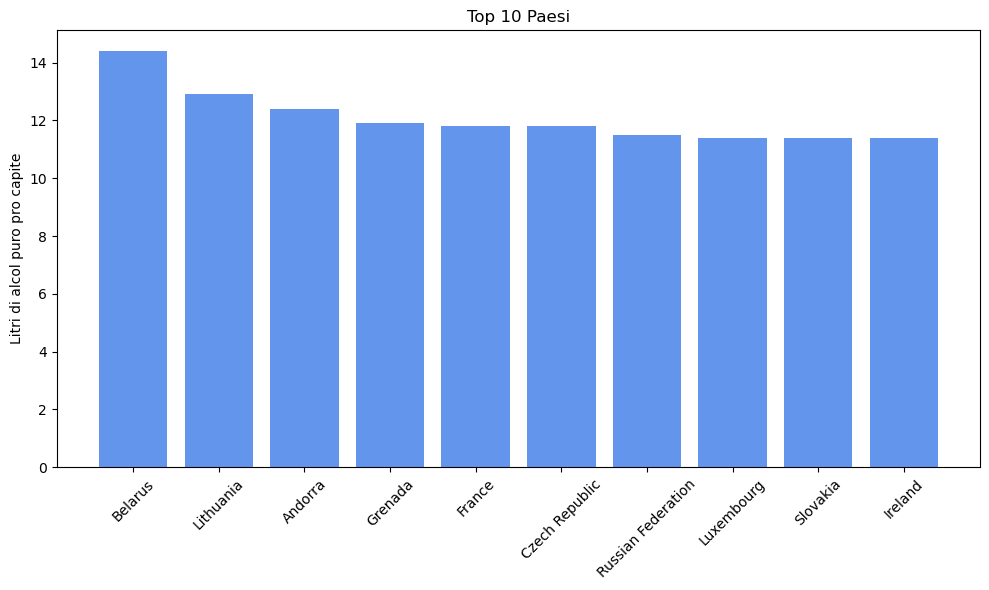

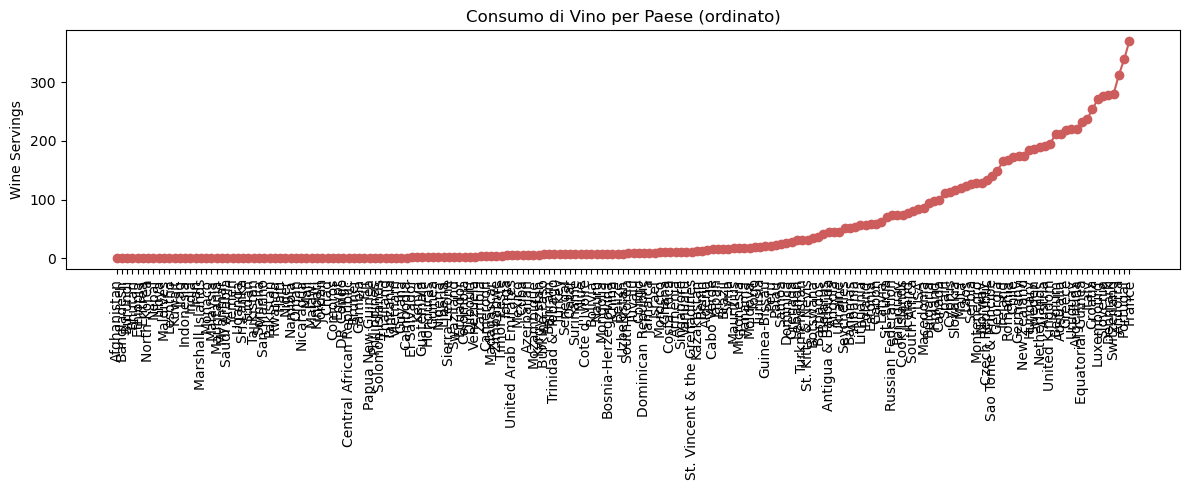

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

top10 = df.sort_values("total_litres_of_pure_alcohol", ascending=False).head(10)
print("Top 10 paesi:")
print(top10[["country", "total_litres_of_pure_alcohol"]], "\n")

beer_avg = df["beer_servings"].mean()
wine_avg = df["wine_servings"].mean()
spirit_avg = df["spirit_servings"].mean()
print(f"Consumo medio annuale:")
print(f"   Birra: {beer_avg:.2f}, Vino: {wine_avg:.2f}, Distillati: {spirit_avg:.2f}\n")

df["alcohol_index"] = (df["beer_servings"] + df["wine_servings"] + df["spirit_servings"]) / 3

top_index = df.loc[df["alcohol_index"].idxmax()]
print("Paese con il massimo alcohol_index:")
print(f"   {top_index['country']} con indice {top_index['alcohol_index']:.2f}\n")

molta_birra = df[df["beer_servings"] > 100]
print("Paesi con più di 100 birre l’anno:")
print(molta_birra["country"].tolist(), "\n")

plt.figure(figsize=(10, 6))
plt.bar(top10["country"], top10["total_litres_of_pure_alcohol"], color='cornflowerblue')
plt.title("Top 10 Paesi")
plt.ylabel("Litri di alcol puro pro capite")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ordinato = df.sort_values("wine_servings")

plt.figure(figsize=(12, 5))
plt.plot(ordinato["country"], ordinato["wine_servings"], marker="o", linestyle="-", color="indianred")
plt.title("Consumo di Vino per Paese (ordinato)")
plt.ylabel("Wine Servings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Salario medio per paese:
 job_country
Belarus                     400000.000000
Russia                      292500.000000
Bahamas                     201511.619048
Dominican Republic          157500.000000
Northern Mariana Islands    155485.500000
Name: salary_year_avg, dtype: float64

Numero di offerte per paese:
 job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

Intervallo stipendio per paese:
                  min       max
job_country                   
Afghanistan      NaN       NaN
Albania      43200.0  157500.0
Algeria      44100.0   45000.0
Angola           NaN       NaN
Argentina    45000.0  222000.0


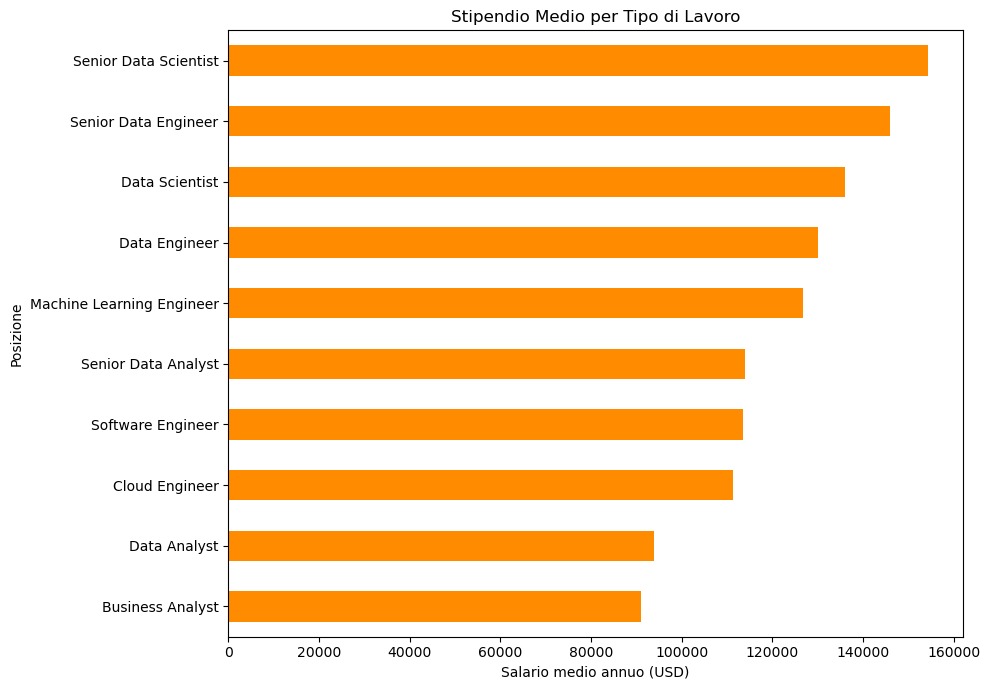

In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

media_stipendio = df.groupby("job_country")["salary_year_avg"].mean().sort_values(ascending=False)
print("Salario medio per paese:\n", media_stipendio.head())

numero_offerte = df["job_country"].value_counts()
print("\nNumero di offerte per paese:\n", numero_offerte.head())

intervallo_stipendio = df.groupby("job_country")["salary_year_avg"].agg(["min", "max"])
print("\nIntervallo stipendio per paese:\n", intervallo_stipendio.head())

stipendi_per_ruolo = df.groupby("job_title_short")["salary_year_avg"].mean().sort_values()

plt.figure(figsize=(10, 7))
stipendi_per_ruolo.plot(kind="barh", color="darkorange")
plt.title("Stipendio Medio per Tipo di Lavoro")
plt.xlabel("Salario medio annuo (USD)")
plt.ylabel("Posizione")
plt.tight_layout()
plt.show()